In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost
from xgboost import XGBClassifier

In [2]:
#Importação dos Dados
clientes = pd.read_csv('clientes.csv')
clientes.head()

,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [3]:
#Verifica as Dimensões do Arquivo
clientes.shape

(614, 12)

In [4]:
#Verificando as informações dos campos da tabela de dados
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sexo                  614 non-null    object
 1   estado_civil          614 non-null    object
 2   dependentes           614 non-null    int64 
 3   educacao              614 non-null    object
 4   empregado             614 non-null    object
 5   renda                 614 non-null    int64 
 6   renda_conjuge         614 non-null    int64 
 7   emprestimo            614 non-null    int64 
 8   prestacao_mensal      614 non-null    int64 
 9   historico_credito     614 non-null    int64 
 10  imovel                614 non-null    object
 11  aprovacao_emprestimo  614 non-null    object
dtypes: int64(6), object(6)
memory usage: 57.7+ KB


In [5]:
#Verifica se há valores Nulos/ausentes
clientes.isnull().sum()

sexo                    0
estado_civil            0
dependentes             0
educacao                0
empregado               0
renda                   0
renda_conjuge           0
emprestimo              0
prestacao_mensal        0
historico_credito       0
imovel                  0
aprovacao_emprestimo    0
dtype: int64

In [6]:
#verifica se há valores duplicados
clientes.duplicated().sum()

0

In [7]:
#Estatísticas descritivas das variáveis numéricas
clientes.describe()

,dependentes,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito
count,614.000000,614.000000,6.140000e+02,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1.868240e+07,145.752443,342.410423,0.855049
std,1.009623,6109.041673,4.030156e+08,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000e+00,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000e+00,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1.221000e+03,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2.324000e+03,164.750000,360.000000,1.000000
max,3.000000,81000.000000,9.858000e+09,700.000000,480.000000,1.000000


In [ ]:
# Tabela de Frequência da Variável "aprovacao_emprestimo" - A Classe ou Label ou Target ou Y ou Variável a ser Predita
clientes.aprovacao_emprestimo.value_counts()

Y    422
N    192
Name: aprovacao_emprestimo, dtype: int64

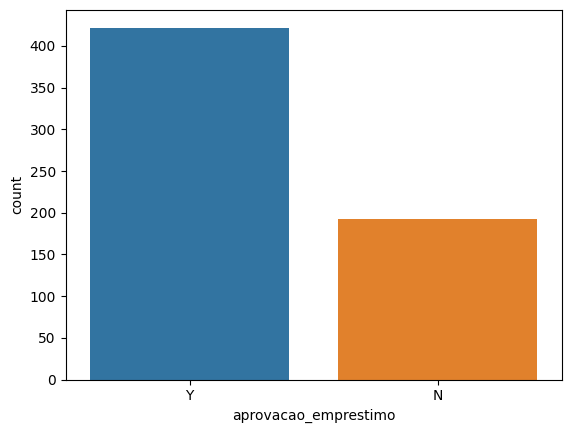

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['aprovacao_emprestimo']);

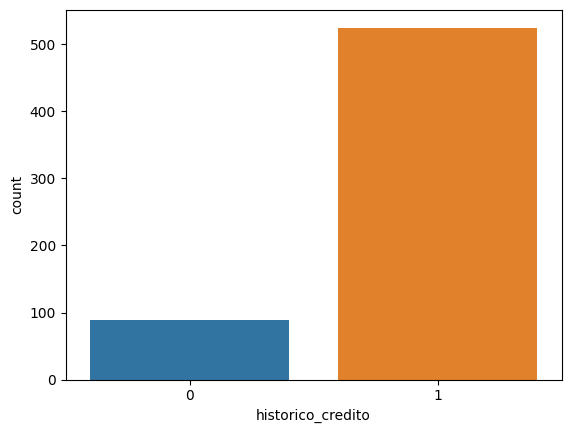

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['historico_credito']);

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['educacao']);

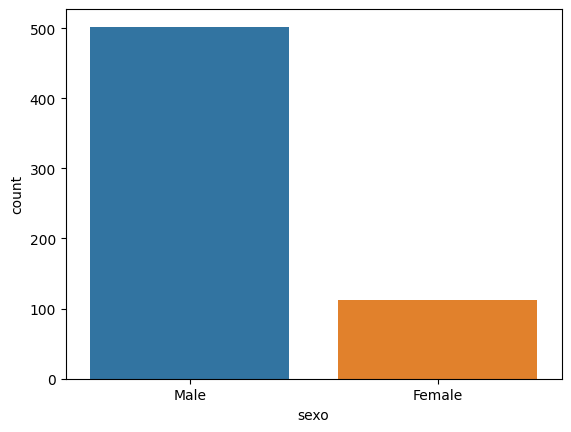

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['sexo']);

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['imovel']);

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['educacao']);

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['dependentes']);

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['estado_civil']);

In [ ]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(x = clientes['empregado']);

In [ ]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(x = clientes['renda'], bins=50, kde=True);

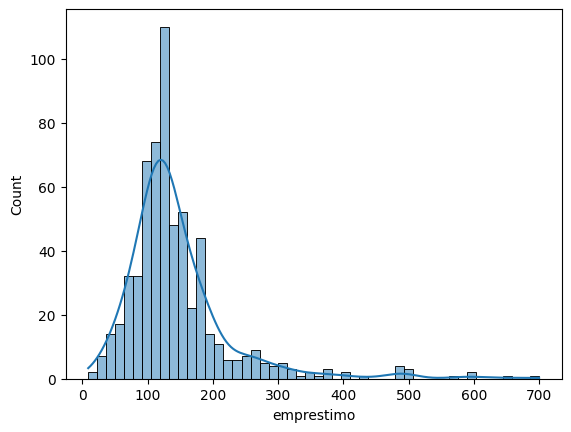

In [ ]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(clientes['emprestimo'], bins=50, kde=True);

##PRÉ-PROCESSAMENTO DOS DADOS

In [29]:
# Divisão entre dados previsores e classe alvo
x_clientes = clientes.iloc[:, 0:11].values

In [30]:
x_clientes

array([[  1,   0,   0, ..., 360,   1,   2],
       [  1,   1,   1, ..., 360,   1,   0],
       [  1,   1,   0, ..., 360,   1,   2],
       ...,
       [  1,   1,   1, ..., 360,   1,   2],
       [  1,   1,   2, ..., 360,   1,   2],
       [  0,   0,   0, ..., 360,   0,   1]])

In [20]:
type(x_clientes)

numpy.ndarray

In [31]:
y_clientes = clientes.iloc[:, 11].values

In [32]:
y_clientes

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [23]:
type(x_clientes), type(y_clientes)

(numpy.ndarray, numpy.ndarray)

In [33]:
# Transformação dos dados categóricos em numéricos.
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder_sexo = LabelEncoder()
label_encoder_estado_civil = LabelEncoder()
label_encoder_educacao = LabelEncoder()
label_encoder_empregado = LabelEncoder()
label_encoder_imovel = LabelEncoder()
label_encoder_aprovacao_emprestimo = LabelEncoder()

In [26]:
clientes['sexo'] = label_encoder_sexo.fit_transform(clientes['sexo'])
clientes['estado_civil'] = label_encoder_estado_civil.fit_transform(clientes['estado_civil'])
clientes['educacao'] = label_encoder_educacao.fit_transform(clientes['educacao'])
clientes['empregado'] = label_encoder_empregado.fit_transform(clientes['empregado'])
clientes['imovel'] = label_encoder_imovel.fit_transform(clientes['imovel'])
clientes['aprovacao_emprestimo'] = label_encoder_aprovacao_emprestimo.fit_transform(clientes['aprovacao_emprestimo'])

In [27]:
clientes

,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71,360,1,0,1
610,1,1,3,0,0,4106,0,40,180,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


In [35]:
# Escalonamento dos valores
from sklearn.preprocessing import StandardScaler
scaler_clientes = StandardScaler()
x_clientes = scaler_clientes.fit_transform(x_clientes)

In [ ]:
x_clientes

In [ ]:
type(x_clientes)

numpy.ndarray

In [36]:
y_clientes

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
type(y_clientes)

numpy.ndarray

### DIVISÃO DE DADOS DE TREINAMENTO E TESTE

In [37]:
# importando Pacote para Amostragem dos Dados
from sklearn.model_selection import train_test_split

In [38]:
# Realizando Amostragem dosa Dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x_clientes,y_clientes, test_size = 0.25, random_state = 0)

In [39]:
x_treino.shape, y_treino.shape

((460, 11), (460,))

In [40]:
x_teste.shape, y_teste.shape

((154, 11), (154,))

### SALVANDO AS VARIÁVEIS DE TREINAMENTO E TESTE

In [41]:
import pickle

In [42]:
with open('clientes.pkl', mode = 'wb') as f:
  pickle.dump([x_treino, y_treino, x_teste, y_teste], f)

# Construção dos modelos preditivos

### XGboost

In [ ]:
import pickle
with open('clientes.pkl', 'rb') as f:
  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [ ]:
x_treino.shape, y_treino.shape

((460, 11), (460,))

In [ ]:
x_teste.shape, y_teste.shape

((154, 11), (154,))

In [ ]:

modelo_1 = XGBClassifier(n_estimators = 10, learning_rate = 0.1, max_depth = 4)
modelo_1.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
previsoes = modelo_1.predict(x_teste)
previsoes

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
y_teste

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.8311688311688312

0.8311688311688312

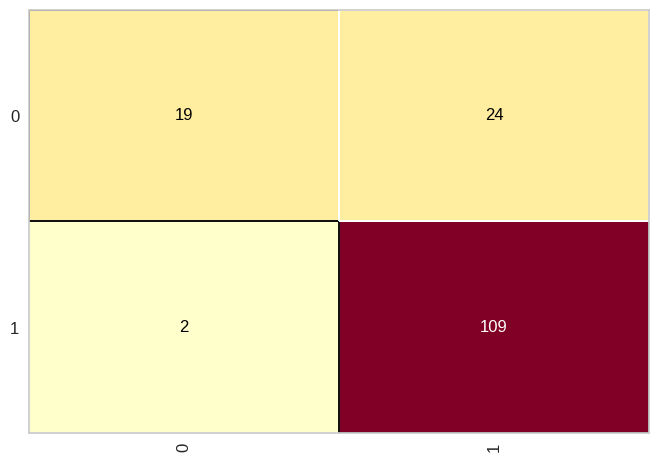

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo_1)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Randon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle
with open('clientes.pkl', 'rb') as f:
  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [ ]:
x_treino.shape, y_treino.shape

((460, 11), (460,))

In [ ]:
x_teste.shape, y_teste.shape

((154, 11), (154,))

In [ ]:
modelo_2 = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=4, random_state = 0)
modelo_2.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       random_state=0)

In [ ]:
previsoes = modelo_2.predict(x_teste)
previsoes

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
y_teste

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.8311688311688312

0.8311688311688312

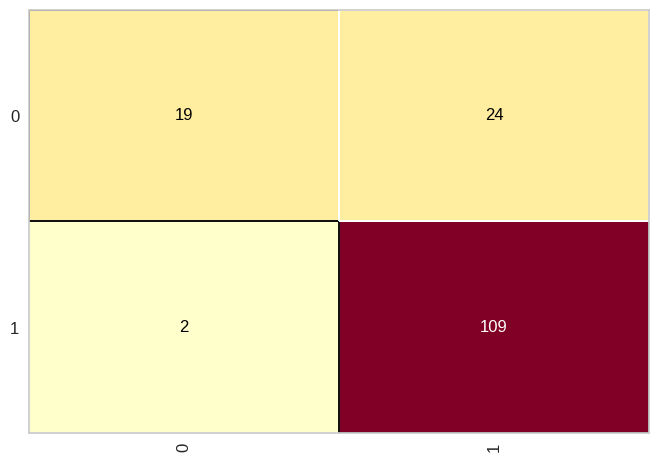

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo_2)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Aprendizagem baseada em instâncias - knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pickle
with open('clientes.pkl', 'rb') as f:
  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [ ]:
x_treino.shape, y_treino.shape

((460, 11), (460,))

In [ ]:
x_teste.shape, y_teste.shape

((154, 11), (154,))

In [ ]:
modelo_3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
modelo_3.fit(x_treino, y_treino)

KNeighborsClassifier()

In [ ]:
previsoes = modelo_3.predict(x_teste)
previsoes

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
y_teste

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.8246753246753247

0.8246753246753247

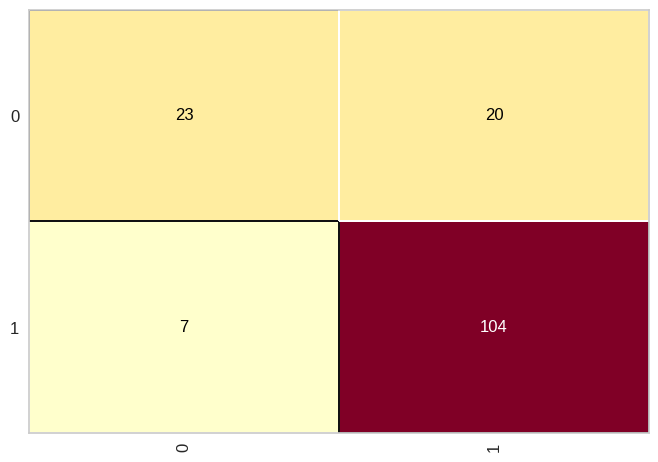

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo_3)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.77      0.53      0.63        43
           1       0.84      0.94      0.89       111

    accuracy                           0.82       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.82      0.82      0.81       154



### REGRESSÃO LOGISTICA

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import pickle
with open('clientes.pkl', 'rb') as f:
  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [ ]:
x_treino.shape, y_treino.shape

((460, 11), (460,))

In [ ]:
x_teste.shape, y_teste.shape

((154, 11), (154,))

In [ ]:
modelo_4 = LogisticRegression(random_state = 0)
modelo_4.fit(x_treino, y_treino)

LogisticRegression(random_state=0)

In [ ]:
previsoes = modelo_4.predict(x_teste)
previsoes

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
y_teste

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.8311688311688312

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo_4)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
import pickle
with open('clientes.pkl', 'rb') as f:
  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [ ]:
x_treino.shape, y_treino.shape

((460, 11), (460,))

In [ ]:
x_teste.shape, y_teste.shape

((154, 11), (154,))

In [ ]:
modelo_5 = SVC(kernel='linear', random_state=1, C = 2.0)
modelo_5.fit(x_treino, y_treino)

SVC(C=2.0, kernel='linear', random_state=1)

In [ ]:
previsoes = modelo_5.predict(x_teste)
previsoes

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
y_teste

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.8311688311688312

0.8311688311688312

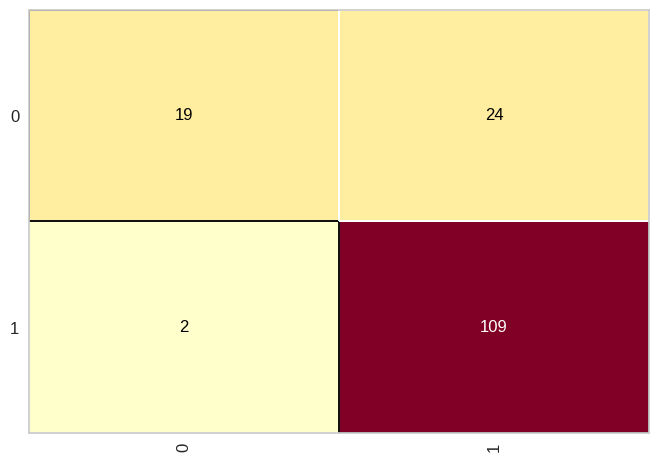

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo_5)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### REDES NEURAIS

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('clientes.pkl', 'rb') as f:
  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [ ]:
x_treino.shape, y_treino.shape

((460, 11), (460,))

In [ ]:
x_teste.shape, y_teste.shape

((154, 11), (154,))

In [ ]:
modelo_6 = MLPClassifier(max_iter=2500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (2,2),
                                   batch_size=10)
modelo_6.fit(x_treino, y_treino)

In [ ]:
previsoes = modelo_6.predict(x_teste)
previsoes

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
y_teste

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.8051948051948052

0.8051948051948052

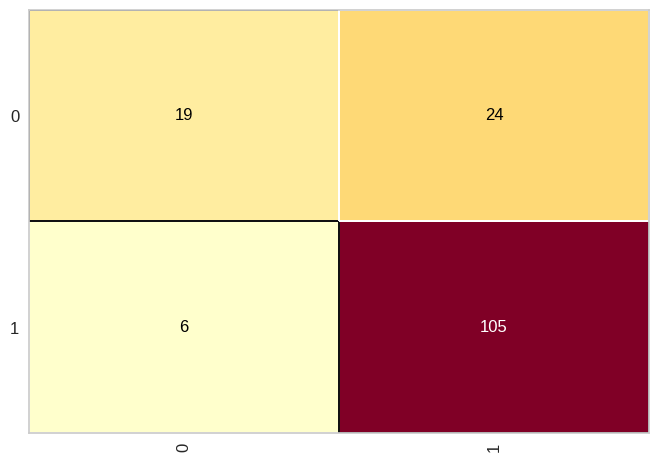

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo_6)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56        43
           1       0.81      0.95      0.88       111

    accuracy                           0.81       154
   macro avg       0.79      0.69      0.72       154
weighted avg       0.80      0.81      0.79       154



### Tuning dos parâmetros com GridSearch

In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [44]:
import pickle
with open('clientes.pkl', 'rb') as f:
  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [47]:
x_treino.shape, y_treino.shape

((460, 11), (460,))

In [46]:
x_teste.shape, y_teste.shape

((154, 11), (154,))

In [45]:
x_clientes = np.concatenate((x_treino, x_teste), axis = 0)
x_clientes.shape

(614, 11)

In [49]:
x_clientes

array([[ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264, -1.37208932, -0.73780632, ...,  0.2732313 ,
         0.41173269, -1.31851281],
       [ 0.47234264, -1.37208932,  1.24474546, ...,  0.2732313 ,
         0.41173269, -1.31851281],
       ...,
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264, -1.37208932, -0.73780632, ...,  0.2732313 ,
         0.41173269, -0.04760721],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
        -2.42876026, -0.04760721]])

In [48]:
y_clientes = np.concatenate((y_treino, y_teste), axis = 0)
y_clientes.shape

(614,)

In [50]:
y_clientes

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

### xgboost

In [ ]:
parametros = {'n_estimators': [2, 5, 10, 20, 40, 50],
              'max-depth': [2, 4, 6, 8, 20],
              'max_leaves': [0, 1,2, 3, 4],
              'verbosity': [0, 3]}

In [ ]:
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=parametros)
grid_search.fit(x_clientes, y_clientes)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### Random Forest

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_clientes, y_clientes)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}
0.8110755697720912


In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_clientes, y_clientes)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.8062108489937359


### KNN

In [ ]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_clientes, y_clientes)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.8062108489937359


### Regressão Logística

In [ ]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_clientes, y_clientes)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

### SVM

In [ ]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_clientes, y_clientes)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'kernel': 'linear', 'tol': 0.001}
0.8094495535119286


### RN

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [5, 10, 20]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_clientes, y_clientes)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

### Validação cruzada

In [13]:
from sklearn.model_selection import cross_val_score, KFold

In [14]:
resultados_modelo_1 = []
resultados_modelo_2 = []
resultados_modelo_3 = []
resultados_modelo_4 = []
resultados_modelo_5 = []
resultados_modelo_6 = []

In [ ]:
for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)


  xgboost = XGBClassifier(n_estimators = 10, learning_rate = 0.1, max_depth = 4)
  scores = cross_val_score(xgboost, x_clientes, y_clientes, cv = kfold)
  resultados_modelo_1.append(scores.mean())

  random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=4, random_state = 0)
  scores = cross_val_score(random_forest, x_clientes, y_clientes, cv = kfold)
  resultados_modelo_2.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
  scores = cross_val_score(knn, x_clientes, y_clientes, cv = kfold)
  resultados_modelo_3.append(scores.mean())

  logistica = LogisticRegression(random_state = 0)
  scores = cross_val_score(logistica, x_clientes, y_clientes, cv = kfold)
  resultados_modelo_4.append(scores.mean())

  svm = SVC(kernel='linear', random_state=1, C = 2.0)
  scores = cross_val_score(svm, x_clientes, y_clientes, cv = kfold)
  resultados_modelo_5.append(scores.mean())

  rede_neural = MLPClassifier(solver = 'adam', activation = 'relu', batch_size=10)
  scores = cross_val_score(rede_neural, x_clientes, y_clientes, cv = kfold)
  resultados_modelo_6.append(scores.mean())

In [ ]:
resultados = pd.DataFrame({'XGboost': resultados_modelo_1,
                           'Radom_forest': resultados_modelo_2,
                           'knn' : resultados_modelo_3,
                           'logistica': resultados_modelo_4,
                           'SVM': resultados_modelo_5,
                           'Rede_neural': resultados_modelo_6})
resultados

In [ ]:
resultados.describe()

In [ ]:
resultados.var()

In [ ]:
(resultados.std() / resultados.mean()) * 100

### **Teste de normalidade nos resultados**

In [56]:
from scipy.stats import shapiro

In [57]:
shapiro(resultados_modelo_1), shapiro(resultados_modelo_2),
shapiro(resultados_modelo_3), shapiro(resultados_modelo_4),
shapiro(resultados_modelo_5), shapiro(resultados_modelo_6)

(ShapiroResult(statistic=0.9846026301383972, pvalue=0.9302321672439575),
 ShapiroResult(statistic=0.9386417269706726, pvalue=0.08361466228961945))

In [ ]:
sns.displot(resultados_modelo_1, kind = 'kde');

In [ ]:
sns.displot(resultados_modelo_2, kind = 'kde');

In [ ]:
sns.displot(resultados_modelo_3, kind = 'kde');

In [ ]:
sns.displot(resultados_modelo_4, kind = 'kde');

In [ ]:
sns.displot(resultados_modelo_5, kind = 'kde');

In [ ]:
sns.displot(resultados_modelo_6, kind = 'kde');

### **Teste de hipótese com ANOVA e Tukey**

In [58]:
from scipy.stats import f_oneway

In [59]:
_, p = f_oneway(resultados_modelo_1, resultados_modelo_2, resultados_modelo_3, resultados_modelo_4, resultados_modelo_5, resultados_modelo_6 )
p

4.069674735422132e-118

In [61]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [62]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_modelo_1, resultados_modelo_2, resultados_modelo_3, resultados_modelo_4, resultados_modelo_5, resultados_modelo_6]),
                         'algoritmo': ['xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost','xgboost',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [63]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.807694,xgboost
1,0.809598,xgboost
2,0.806372,xgboost
3,0.809307,xgboost
4,0.806055,xgboost
...,...,...
175,0.772025,rede_neural
176,0.763882,rede_neural
177,0.762163,rede_neural
178,0.767054,rede_neural


In [64]:
from statsmodels.stats.multicomp import MultiComparison

In [65]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])


In [66]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
          knn     logistica   0.0241    0.0  0.0216  0.0266   True
          knn random_forest   0.0239    0.0  0.0214  0.0264   True
          knn   rede_neural  -0.0151    0.0 -0.0176 -0.0126   True
          knn           svm    0.026    0.0  0.0235  0.0285   True
          knn       xgboost   0.0252    0.0  0.0227  0.0277   True
    logistica random_forest  -0.0002 0.9998 -0.0027  0.0023  False
    logistica   rede_neural  -0.0392    0.0 -0.0417 -0.0367   True
    logistica           svm    0.002 0.2229 -0.0006  0.0045  False
    logistica       xgboost   0.0011 0.8142 -0.0014  0.0036  False
random_forest   rede_neural   -0.039    0.0 -0.0415 -0.0365   True
random_forest           svm   0.0022 0.1291 -0.0003  0.0047  False
random_forest       xgboost   0.0013 0.6633 -0.0012  0.0038  F

In [67]:
resultados.mean()

XGboost         0.808582
Radom_forest    0.807277
knn             0.783408
logistica       0.807500
SVM             0.809451
Rede_neural     0.768272
dtype: float64

In [ ]:
teste_estatistico.plot_simultaneous();

### **Salvando um classificador treinado**

In [69]:
import pickle
with open('clientes.pkl', 'rb') as f:
  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [70]:
x_clientes = np.concatenate((x_treino, x_teste), axis = 0)
y_clientes = np.concatenate((y_treino, y_teste), axis = 0)

In [71]:
x_clientes.shape, y_clientes.shape

((614, 11), (614,))

In [72]:
from sklearn.svm import SVC

In [73]:
modelo_final = SVC(kernel='linear', random_state=1, C = 2.0)
modelo_final.fit(x_clientes, y_clientes)

SVC(C=2.0, kernel='linear', random_state=1)

In [74]:
import pickle
pickle.dump(modelo_final, open('modelo_final.pkl', 'wb'))

In [75]:
!pip freeze > requirements.txt


In [76]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>